## 1. 라이브러리 Import

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 

## 2. 데이터 확인

### Fashion Mnist 불러오기

In [3]:
# fashion_mnist dataset keras에서 import 가능함
fashion_mnist = tf.keras.datasets.fashion_mnist
# fashion_mnist data 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(len(X_train), len(X_test))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


### 데이터 포맷 확인하기

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 레이블 이름 튜플로 저장하기

In [5]:
item = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

## 3. EDA(Exploratory Data Analysis); 데이터 분석

### 레이블 카운팅

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[]

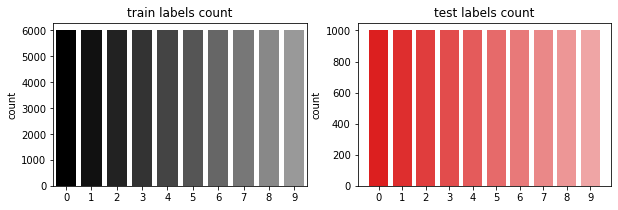

In [6]:
import seaborn as sns

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
sns.countplot(y_train, palette=['#' + ('{}'.format(i))*6 for i in range(10)])
plt.title('train labels count')

plt.subplot(1, 2, 2)
sns.countplot(y_test, palette=['#fb'+('{}'.format(i))*4 for i in range(10)])
plt.title('test labels count')

plt.plot()

### Train 및 Test 이미지 확인

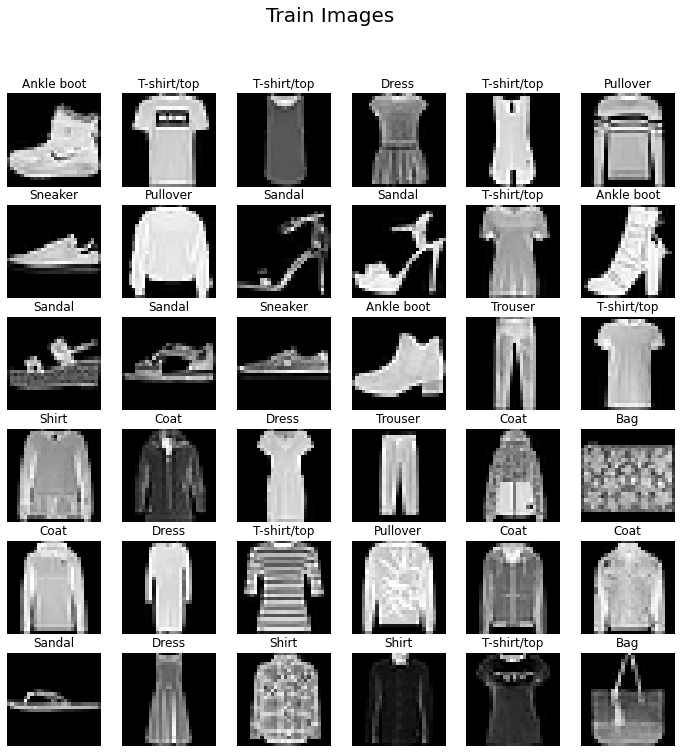

In [7]:
# Train Image

plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.suptitle('Train Images', fontsize=20)
    plt.title(item[y_train[i]])
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

# plt.imshow(X_train[2], cmap='pink')
# plt.colorbar()
# plt.show()
# print('정답범주', y_train[2])

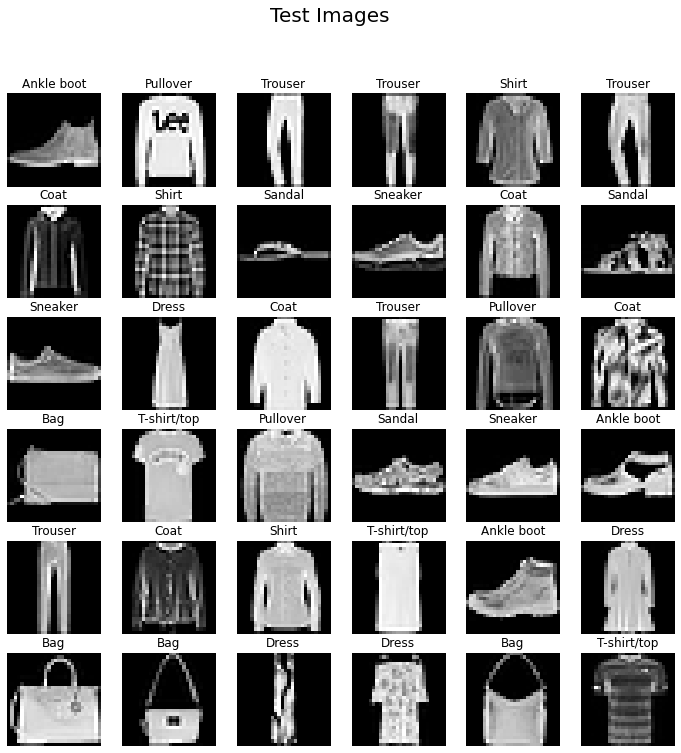

In [8]:
# Test Image

plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.suptitle('Test Images', fontsize=20)
    plt.title(item[y_test[i]])
    plt.imshow(X_test[i], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

In [10]:
print(X_train[2].shape)
print(X_test[2].shape)
print(X_test[[2]].shape)
print(X_test[:3])

(28, 28)
(28, 28)
(1, 28, 28)
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   1   0   0   7   0  37   0   0]
  [  0   0   0   0   0   0   0   0   0   0

## 4. 데이터 전처리(Preprocessing)

### 이미지 데이터 전처리

In [11]:
# 데이터 'Normalization' 과정

# X_train = X_train / 255.0
# X_test = X_test / 255.0
# print(X_train[2])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.08627451 0.4627451  0.09411765 0.         0.         0.         0.         0.         0.18823529 0.34509804 0.01960784 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.04705882 0.39215686 0.83137255 0.80392157 0.7254902  0.70196078 0.67843137 0.72941176 0.75686275 0.86666667 0.55686275 0.33333333 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.33333333 0.29803922 0.78039216 0.88235294 0.97254902 1.         0.93333333 0.88627451 0.61568627 0.26666667 0.31372549 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [15]:
# 기존 3차원이던 데이터 4차원으로 변경
X_train = X_train.reshape(-1, 28, 28, 1)
# Data Type 'Float 32'로 변경
X_train = X_train.astype('float32')
# Normalization 진행
X_train = X_train/255

### 레이블 데이터 전처리

In [16]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩(One-hot Encoding)을 통해 10개의 레이블이 0과 1로 표현되도록 변경
y_onehot_train = to_categorical(y_train, num_classes = 10)
y_onehot_test = to_categorical(y_test, num_classes = 10)

### 결과

In [22]:
for i in [X_train, y_onehot_train, X_test, y_onehot_test]:
    print(i.shape)

"""
이미지 데이터는 3차원->4차원으로 변경
레이블 데이터는 원-핫 인코딩을 통해 2차원으로 변경됨
"""

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## 5. Keras를 활용한 모델 생성
Keras를 사용해 옷 종류를 분류하는 신경망 구성하기

### Hyper Parameter 생성하기

In [26]:
INPUT_SHAPE = (28, 28, 1) # 입력 데이터가 들어가는 포멧 설정
OUTPUT_SHAPE = 10 # 출력 데이터가 나오는 포멧 설정
BATCH_SIZE = 128 # 한 번에 처리할 데이터량 설정
EPOCHS = 10 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

### Model 생성하기

In [23]:
# 다층 퍼셉트론
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [25]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(X_train.shape, X_test.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [27]:
# vggnet 모방 모델
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

### Model 컴파일 및 Summary

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)        

### Model 학습시키기

Earlystopping 클래스의 구성 요소

*   <b>Performance measure</b> : 어떤 성능을 monitoring 할 것인가?
*   <b>Trigger</b> : 언제 training 을 멈출 것인가?



Earlystopping 객체는 초기화될 때 두개의 요소를 정의하게 된다. 



아래와 같이 지정하면 validation set 의 loss 를 monitoring 한다는 뜻이다. 



es = EarlyStopping(monitor='val_loss')



만약 performance measure가 최소화 시켜야하는 것이면 mode를 min 으로, 최대화 시켜야하는 것이면 mode를 max로 지정한다. loss 의 경우, 최소화 시키는 방향으로 training 이 진행되므로 min 을 지정한다. 



es = EarlyStopping(monitor='val_loss', mode='min')



mode 의 default 는 auto 인데, 이는 keras 에서 알아서 min, max 를 선택하게 된다. 여기까지가 가장 기본적인 Early stopping 의 사용법이다. performance measure를 정의하고, 이것을 최대화 할지, 최소화 할지를 지정하는 것이다. 그러면 keras 에서 알아서 적절한 epoch 에서 training 을 멈춘다. verbose=1 로 지정하면, 언제 keras 에서 training 을 멈추었는지를 화면에 출력할 수 있다. 



성능이 증가하지 않는다고, 그 순간 바로 멈추는 것은 효과적이지않을 수 있다. patience 는 성능이 증가하지 않는 epoch 을 몇 번이나 허용할 것인가를 정의한다. partience 는 다소 주관적인 기준이다. 사용한 데이터와 모델의 설계에 따라 최적의 값이 바뀔 수 있다. 



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)



만약 performance measure 를 practical 하게 설정한 경우 성능의 증가의 기준을 직접 정의할 수 있다. 예를 들어 아래 코드는 validation accuracy 가 1% 증가하지 않는 경우, 성능의 증가가 없다고 정의한다. 



특정값에 도달했을 때, 더 이상 training 이 필요하지 않은 경우가 있다. 이 경우 baseline 파라미터를 통해 정의할 수 있다. 



es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)



최종적으로 mode.fit 함수의 callback 으로 early stopping 객체를 넣어주면 early stopping 을 적용할 수 있다. 



hist = model.fit(train_x, train_y, nb_epoch=10,  

                 batch_size=10, verbose=2, validation_split=0.2,   

                 callbacks=[early_stopping])  



출처: https://3months.tistory.com/424 [Deep Play]

In [35]:
from keras.callbacks import EarlyStopping

history = model.fit(X_train, y_train, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3032 - accuracy: 0.0969 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/500
1407/1407 [==============================] - 13s 10ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.1004
Epoch 3/500
1407/1407 [==============================] - 13s 10ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 4/500
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3028 - accuracy: 0.1009 - val_loss: 2.3025 - val_accuracy: 0.1003
Epoch 5/500
1407/1407 [==============================] - 13s 10ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/500
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 7/500
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.

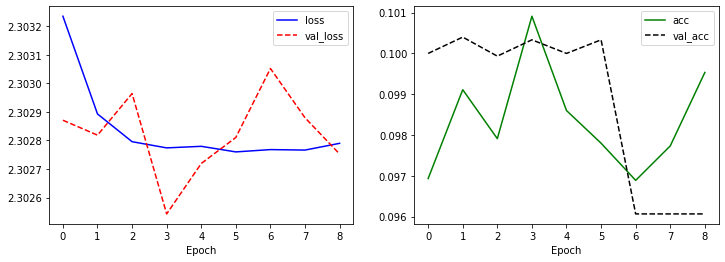

In [43]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X,test_Y)

In [ ]:
# 예측수행 부분... 우리가 가지고 있는 사진을 넣었을때, 이 이미지에 대한 예측 범주 출력
# 수업시간때는, 테스트 데이터 안의 사진을 가지고 수행하였다.
# 이미지 불러오는 방법 찾아보기
# 불러온 이미지 변수에 담아서, model.predict(변수명)
# 예측 수행 범주 확인해주기.

In [38]:
""" (사용하고 싶다면, 주석을 제거하고 사용하세요.)
# png 파일 -> jpg로 변경하는 코드
# 파일의 품질 값도 지정해야 함(0 ~ 100), default는 95

import cv2

# Load .png image
image = cv2.imread('image.png')

# Save .jpg image
cv2.imwrite('image.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
"""

" (사용하고 싶다면, 주석을 제거하고 사용하세요.)\n# png 파일 -> jpg로 변경하는 코드\n# 파일의 품질 값도 지정해야 함(0 ~ 100), default는 95\n\nimport cv2\n\n# Load .png image\nimage = cv2.imread('image.png')\n\n# Save .jpg image\ncv2.imwrite('image.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])\n"

In [44]:
# 모델 임포트 후 의상 부분만 추출하는 코드.

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/반팔티예시.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)
        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


NameError: ignored

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# print(image_crop.shape)
cv2_imshow(image_crop)
# print(image_crop[0])
for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

In [ ]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

In [ ]:
# 정규화 해준다.
input_image = image_gray/255.0
# print(input_image.shape)
# print(input_image)

In [ ]:
# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape
# input_image

In [ ]:
# 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠

In [ ]:
#예측 수행
pred_X = model.predict(input_image)
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)